In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Stochastic gradient descent (SGD)

fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
fish_input, fish_target, random_state= 42)

In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
from sklearn.linear_model import SGDClassifier

In [10]:
sc = SGDClassifier(loss = 'log', max_iter= 100)

sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=100)

In [12]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8235294117647058
0.825


In [16]:
# partial fit
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

classes = np.unique(train_target)
print(classes)

0.8151260504201681
0.875
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [20]:
sc = SGDClassifier(loss = 'log')

train_score = []
test_score = []

for i in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled,test_target))

<function matplotlib.pyplot.show(close=None, block=None)>

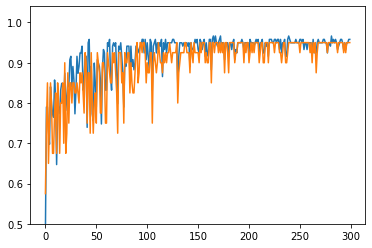

In [24]:
plt.plot(train_score, label = 'train')
plt.plot(test_score, label = 'test')
plt.ylim(0.5, 1.04)
plt.legend

plt.show